## TP 4 - Perceptron, MLP

Dans ce TP nous allons explorer les réseaux de neurones pour la classification. Importez les librairies de base dont nous aurons besoin, comme aux TPs précédents:

In [10]:
# import des outils mathématiques
import numpy as np

# import des outils d'affichage
import matplotlib.pyplot as plt

# import des outils de machine learning
import sklearn as skl
import sklearn.datasets as data

Tout comme dans le TP2 (reprenez le code), générez un problème de classification à deux classes et affichez les données.

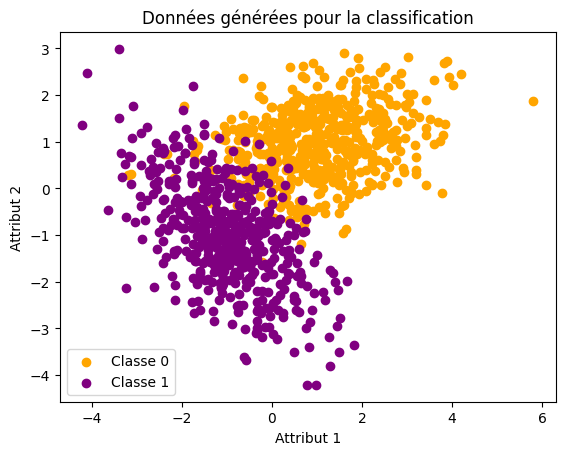

In [11]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

def plot_data(x, y):
    plt.scatter(x[y == 0, 0], x[y == 0, 1], color='orange', label='Classe 0')
    plt.scatter(x[y == 1, 0], x[y == 1, 1], color='purple', label='Classe 1')
    plt.xlabel('Attribut 1')
    plt.ylabel('Attribut 2')
    plt.legend()
    plt.title('Données générées pour la classification')
    plt.show()

# Génération du dataset synthétique
x, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=26)

# Affichage des données générées
plot_data(x, y)

Tout comme dans le TP1, on commence par ajouter une dimension au vecteur x et dont les valeurs sont toutes à 1 (avec `add_dummy_feature`). Importez la classe `Perceptron` de `sklearn.linear_model` et réalisez son apprentissage sur les données. les coefficients de la droite peuvent être récupérés dans la propriété `coef_[0]` du perceptron, stockez les dans un vecteur nommé `w1`.  Programmez ensuite la descente de gradient batch : faites une boucle sur les époques et une sur les instances et modifiez le vecteur des poids pour chaque instance (c'est la version batch du sgd). Stockez les coefficient obtenus dans un vecteur nommé `w2`. Fixez le learning rate à 1 et le nombre d'itérations à 10. La fonction d'activation sera la fonction logistique. VOus devez appliquer la modification suivante pour les poids : $\textbf{w}^{t+1}=\textbf{w}^{t}-\alpha\textbf{x}_i(\sigma(\textbf{w}^T\textbf{x}_i)-y_i)$ Affichez `w1`et `w2`. Écrivez une fonction `plot_decision` afin d'afficher les frontières de décisions (inspirez vous du TP2 avec la classification logistique) obtenues avec w1 et w2. Les résultats sont-il proches ?

w1 (sklearn Perceptron): [ 0.         -2.74040169 -2.16040526]
w2 (gradient descent):   [-1.0022504  -2.85741218 -3.79943945]


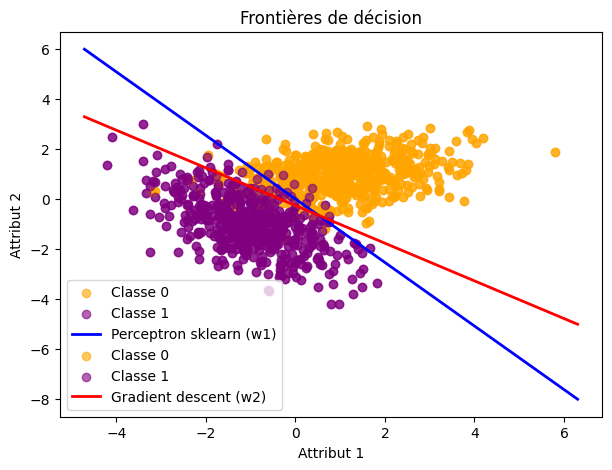

In [12]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import add_dummy_feature

# ajout de la composante biais
X = add_dummy_feature(x)  # shape (n_samples, 3) with first column = 1

# apprentissage avec sklearn Perceptron (on désactive l'intercept car on a ajouté la colonne de biais)
per = Perceptron(fit_intercept=False, max_iter=1000, tol=1e-3, random_state=0)
per.fit(X, y)
w1 = per.coef_[0].copy()

# descente de gradient (version "batch" demandée : boucle sur époques puis sur instances)
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

alpha = 1.0
n_epochs = 10
w = np.zeros(X.shape[1])  # initialisation
for _ in range(n_epochs):
    for i in range(X.shape[0]):
        xi = X[i]
        yi = y[i]
        pred = sigmoid(np.dot(w, xi))
        w = w - alpha * xi * (pred - yi)
w2 = w.copy()

print("w1 (sklearn Perceptron):", w1)
print("w2 (gradient descent):  ", w2)

# fonction pour afficher frontières de décision
def plot_decision(w, ax=None, label=None, color='black', lw=2):
    if ax is None:
        fig, ax = plt.subplots()
    # scatter des données
    ax.scatter(x[y == 0, 0], x[y == 0, 1], color='orange', label='Classe 0', alpha=0.6)
    ax.scatter(x[y == 1, 0], x[y == 1, 1], color='purple', label='Classe 1', alpha=0.6)
    # tracer la droite w0 + w1*x + w2*y = 0 -> y = -(w0 + w1*x)/w2
    xs = np.linspace(x[:, 0].min() - 0.5, x[:, 0].max() + 0.5, 200)
    if abs(w[2]) > 1e-12:
        ys = -(w[0] + w[1] * xs) / w[2]
        ax.plot(xs, ys, color=color, lw=lw, label=label)
    else:
        # cas vertical
        xv = -w[0] / w[1]
        ax.axvline(x=xv, color=color, lw=lw, label=label)
    ax.set_xlabel('Attribut 1')
    ax.set_ylabel('Attribut 2')
    ax.legend()
    ax.set_title('Frontières de décision')

# affichage des deux frontières
fig, ax = plt.subplots(figsize=(7, 5))
plot_decision(w1, ax=ax, label='Perceptron sklearn (w1)', color='blue', lw=2)
plot_decision(w2, ax=ax, label='Gradient descent (w2)', color='red', lw=2)
plt.show()

Comme le perceptron ne permet de faire que des séparations linéaires, son intérêt est limité dès lors que les données sont complexes. Néanmoins, il est possible de mettre des perceptrons en couche, comme montré dans les exemples suivants. Cela se nomme un MLP (Multi Layer Perceptron). On parlera alors d'entrées, de couches cachées et de couche de sortie pour le MLP.

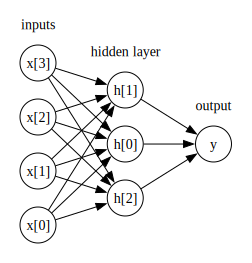

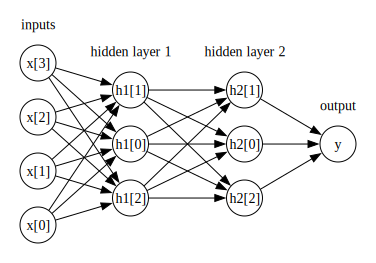

In [13]:
import mglearn
display(mglearn.plots.plot_single_hidden_layer_graph())
display(mglearn.plots.plot_two_hidden_layer_graph())

Importez la fonction `make_moons` de `sklearn.datasets` et créez un dataset (qui aura la forme de deux lunes (two moons)) avec 100 examples et un bruit de 0.25. Découpez le dataset en train/test puis effectuez l'apprentissage d'un MLP. Ce classifieur se nomme est `MLPClassifier`  et est disponible dans `sklearn.neural_network`. Essayez tout d'abord avec ces paramètres : 10 neurones sur une seule couche cachée, un solver lbfgs et 500 itérations maximum. Affichez les performances en test. Affichez les données (avec plot_data) et la frontière de séparation avec `mglearn.plots.plot_2d_separator(mlp, x, fill=True, alpha=.3)` avec `x` le dataset complet et `mlp` le MLP appris. Testez ensuite en faisant varier à l'aide d'une boucle le nombre de neurones cachés entre 10 et 90 par pas de 10, de façon à avoir deux couches cachées de même taille. Comparez les performances de ces modèles.

Score sur le jeu de test: 0.8


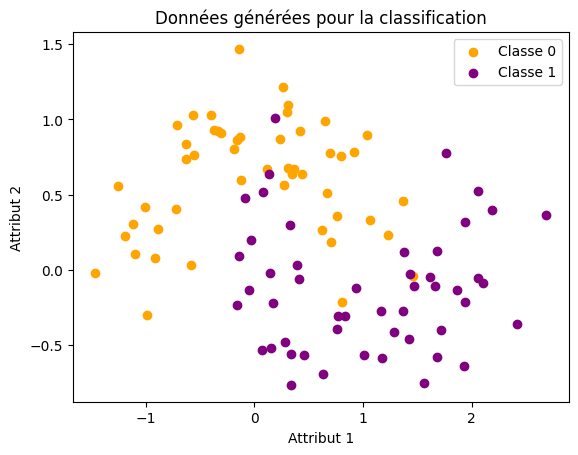

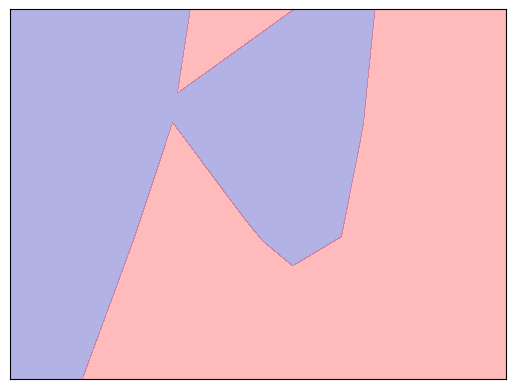

Score avec 10 neurones par couche: 0.800
Score avec 20 neurones par couche: 0.850
Score avec 30 neurones par couche: 0.900
Score avec 40 neurones par couche: 0.850
Score avec 50 neurones par couche: 0.850
Score avec 60 neurones par couche: 0.850
Score avec 70 neurones par couche: 0.900
Score avec 80 neurones par couche: 0.850
Score avec 90 neurones par couche: 0.850


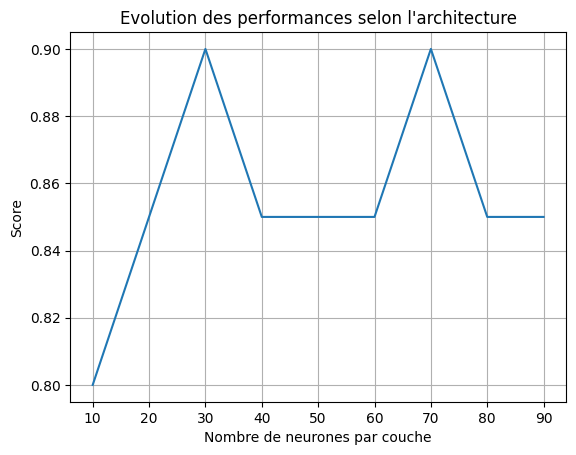

In [14]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import numpy as np

# Création du dataset
X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Premier MLP avec une couche cachée de 10 neurones
mlp = MLPClassifier(hidden_layer_sizes=(10,), solver='lbfgs', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Affichage des performances
print("Score sur le jeu de test:", mlp.score(X_test, y_test))

# Affichage des données et de la frontière
plot_data(X, y)
mglearn.plots.plot_2d_separator(mlp, X, fill=True, alpha=.3)
plt.show()

# Test avec différentes architectures à 2 couches cachées
scores = []
neurons = range(10, 100, 10)

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), solver='lbfgs', max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)
    score = mlp.score(X_test, y_test)
    scores.append(score)
    print(f"Score avec {n} neurones par couche: {score:.3f}")
    
# Visualisation des scores
plt.plot(neurons, scores)
plt.xlabel("Nombre de neurones par couche")
plt.ylabel("Score")
plt.title("Evolution des performances selon l'architecture")
plt.grid(True)
plt.show()

Essayez sur un problème réel à présent et construisez un classifieur MLP sur les données iris, et affichez ses performances. Attention à bien normaliser les données avant de les traiter (utilisez un pipeline). C'est à vous de choisir les paramètres du MLP !

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

# Load iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with scaler and MLP
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(10, 10),  # Two hidden layers with 10 neurons each
        max_iter=1000,
        activation='relu',
        solver='adam',
        random_state=42
    ))
])

# Train and evaluate
pipeline.fit(X_train, y_train)
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f"Training accuracy: {train_score:.3f}")
print(f"Test accuracy: {test_score:.3f}")

Training accuracy: 0.967
Test accuracy: 0.967


Reprenez l'ensemble des chiffres manuscrits à reconnaître comme dans le TP précédent. Créez un MLP pour les classer et affichez ses performances. Utilisez deux couches cachées, un solver de type sgd ou lbfgs, une fonction d'activation de type relu ou logistic et les paramètres suivants : alpha=0.0001, tol=0.01, n_iter_no_change=30 et learning_rate_init=.1. Affichez les performances et cherchez manuellement les meilleurs paramètres : nombre de neurones sur les couches cachées, solver et fonction d'activation.

In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

# Chargement des digits
X_digits, y_digits = load_digits(return_X_y=True)

# Split et normalisation
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42, stratify=y_digits)
scaler = StandardScaler().fit(X_train_d)
X_train_d_scaled = scaler.transform(X_train_d)
X_test_d_scaled = scaler.transform(X_test_d)

# Paramètres demandés
common_params = {
    "alpha": 0.0001,
    "tol": 0.01,
    "n_iter_no_change": 30,
    "learning_rate_init": 0.1,
    "max_iter": 500,
    "random_state": 42
}

# Modèle de base (deux couches cachées)
mlp_base = MLPClassifier(hidden_layer_sizes=(50, 50), activation='relu', solver='sgd', **common_params)
mlp_base.fit(X_train_d_scaled, y_train_d)
y_pred_base = mlp_base.predict(X_test_d_scaled)
print("Base model (50,50) | solver=sgd | activation=relu")
print("Test accuracy:", accuracy_score(y_test_d, y_pred_base))
print(classification_report(y_test_d, y_pred_base, zero_division=0))

# Recherche manuelle (quelques architectures et combinaisons solver/activation)
hidden_options = [(10,10), (30,30), (50,50), (100,100)]
solvers = ['sgd', 'lbfgs']
activations = ['relu', 'logistic']

best_score = -np.inf
best_cfg = None
results = []

for h in hidden_options:
    for s in solvers:
        for a in activations:
            params = dict(hidden_layer_sizes=h, solver=s, activation=a, **common_params)
            # lbfgs ignores learning_rate_init and n_iter_no_change, but it's fine to pass them
            clf = MLPClassifier(**params)
            clf.fit(X_train_d_scaled, y_train_d)
            score = clf.score(X_test_d_scaled, y_test_d)
            results.append((h, s, a, score))
            if score > best_score:
                best_score = score
                best_cfg = (h, s, a)
            print(f"hidden={h}, solver={s}, activation={a} -> test acc: {score:.4f}")

print("\nBest configuration found (manual search):", best_cfg, "with test accuracy:", best_score)

# Affichage des performances détaillées du meilleur modèle
best_clf = MLPClassifier(hidden_layer_sizes=best_cfg[0], solver=best_cfg[1], activation=best_cfg[2], **common_params)
best_clf.fit(X_train_d_scaled, y_train_d)
y_pred_best = best_clf.predict(X_test_d_scaled)
print("\nClassification report for best model:")
print(classification_report(y_test_d, y_pred_best, zero_division=0))

Base model (50,50) | solver=sgd | activation=relu
Test accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      0.97      0.95        36
           2       0.97      1.00      0.99        35
           3       1.00      0.97      0.99        37
           4       0.97      0.97      0.97        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       0.97      0.91      0.94        35
           9       0.97      0.97      0.97        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

hidden=(10, 10), solver=sgd, activation=relu -> test acc: 0.9389
hidden=(10, 10), solver=sgd, activation=logistic -> test acc: 0.9306
hidden=(10, 10), solver

Trouver les meilleurs paramètres manuellement est plus que difficile. Pour éviter cela on peut faire un GridSearch comme dans le TP précédent. Pour cela on commence par fixer les paramètres à explorer et on normalise des données (pour éviter d'utiliser un pipeline avec le gridsearch). Appliquez un grid search, affichez les paramètres du meilleur modèle (sont-ils proches de ceux que vous aviez trouvé ?), et appliquez le meilleur modèle sur les données de test (normalisées).

In [21]:
#on fixe les paramètres à explorer 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

tuned_parameters = {
    'hidden_layer_sizes': [(10,10),(20,20),(30,30),(40,40),(50,50),(60,60),(70,70)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'lbfgs']
}

# Normalisation des données
scaler = StandardScaler().fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

# Grid search
mlp = MLPClassifier(max_iter=1000, random_state=42)
grid = GridSearchCV(mlp, tuned_parameters, cv=5, n_jobs=-1)
grid.fit(x_train_scaled, y_train)

print("Meilleurs paramètres trouvés :", grid.best_params_)
print("Score sur le jeu de test :", grid.score(x_test_scaled, y_test))

Meilleurs paramètres trouvés : {'activation': 'logistic', 'hidden_layer_sizes': (60, 60), 'solver': 'lbfgs'}
Score sur le jeu de test : 1.0
